# Fetching and learning about the data

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

### Reading the data

In [4]:
import pandas as pd

def read_data(housing_path=HOUSING_PATH):
  path = os.path.join(housing_path, "housing.csv")
  data = pd.read_csv(path)
  return data

### Taking a quick look at the data

In [5]:
data = read_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


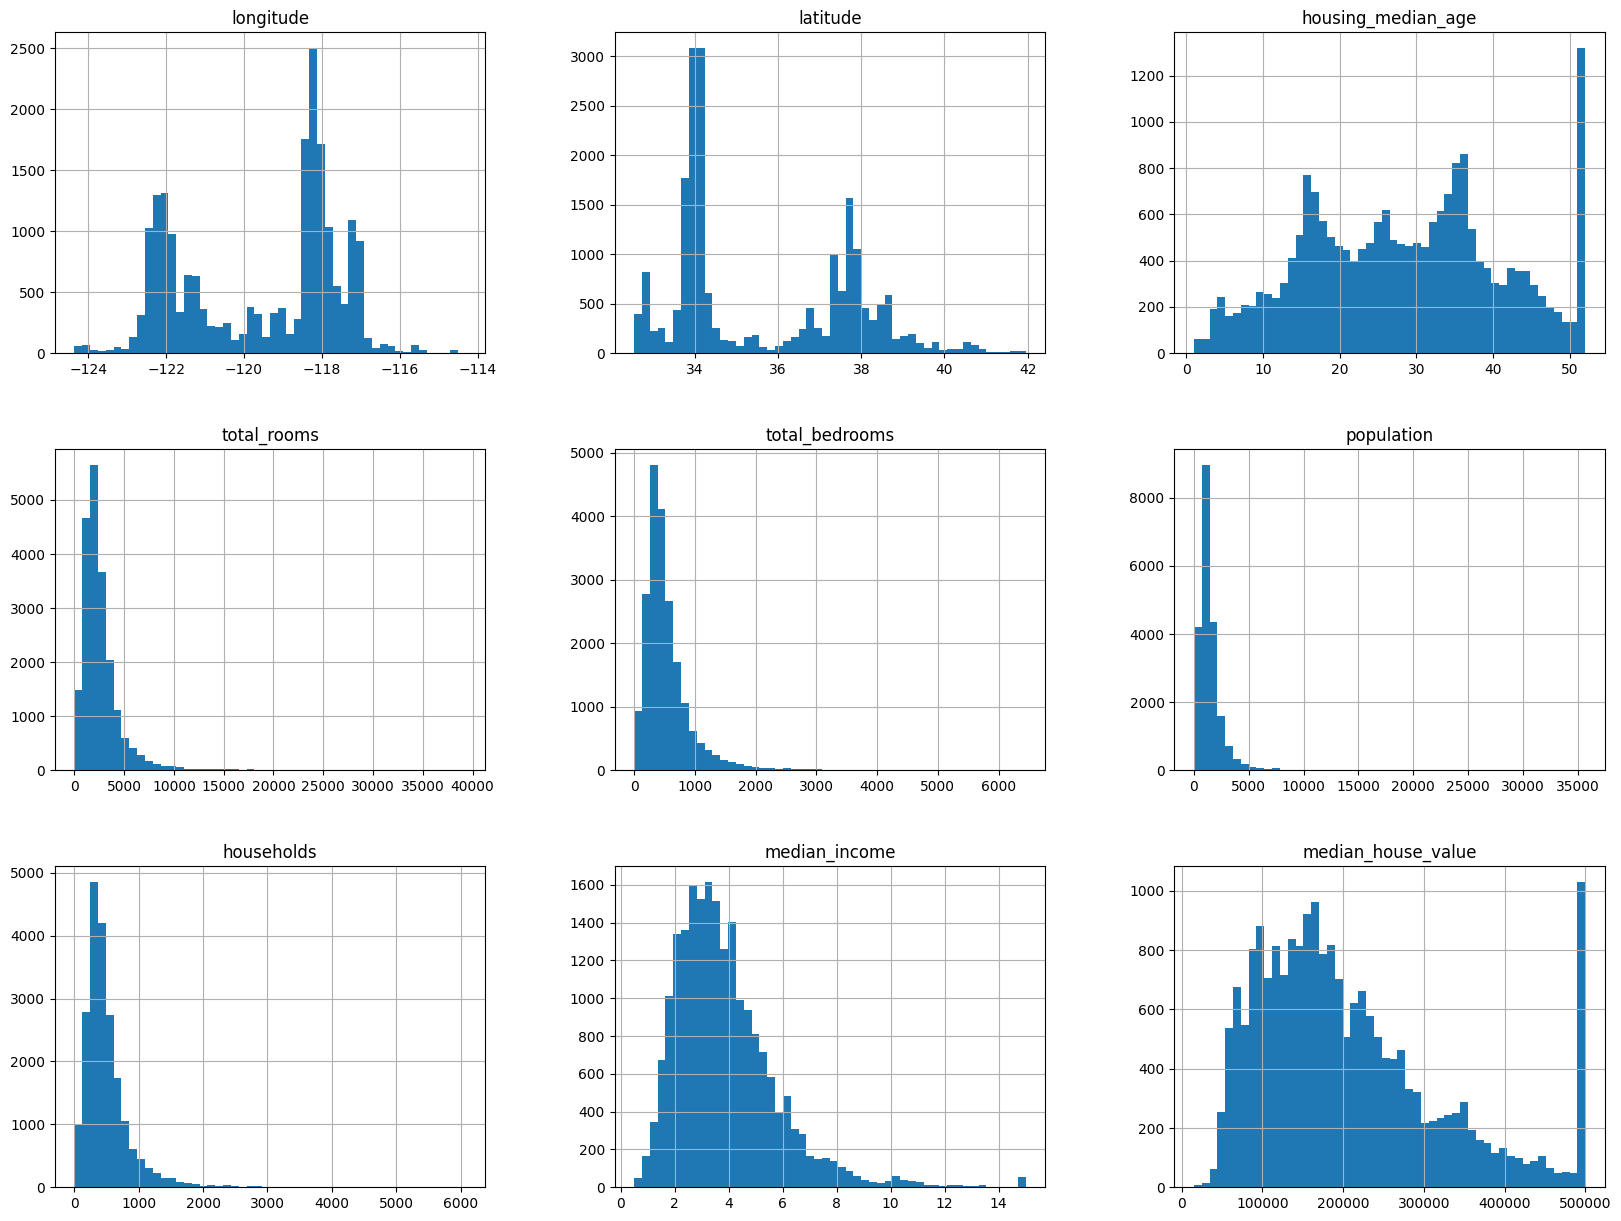

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()

### Splitting into train and test data

In [26]:
import numpy as np 

# This keeps the randomization the same everytime so that our model doesnt see any test data
#   Note: this only works if the data isn't updated over time.
np.random.seed(42)

# Data is a pandas DataFrame, test_ratio is the amount needed in the test set
def split_train_test_man(data, test_ratio):
  random_indices = np.random.permutation(len(data))
  test_set_length = int(len(data) * test_ratio)
  test_indices = random_indices[:test_set_length]
  train_indices = random_indices[test_set_length:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test_man(data, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


Same implementation in scikit-learn

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, random_state=42, test_size=0.2)
print(len(train_set))
print(len(test_set))

16512
4128


### Implmenting Statified Sampling for household income to reduce bias 

In [32]:
data["income_category"] = pd.cut(data["median_income"],
                                bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                labels=[1, 2, 3, 4, 5])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_category"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


strat_train_set["income_category"].value_counts() / len(strat_train_set)


income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [37]:
# Dropping the category we made

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_category", axis=1, inplace=True)

# Visualizing the data

In [38]:
housing = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

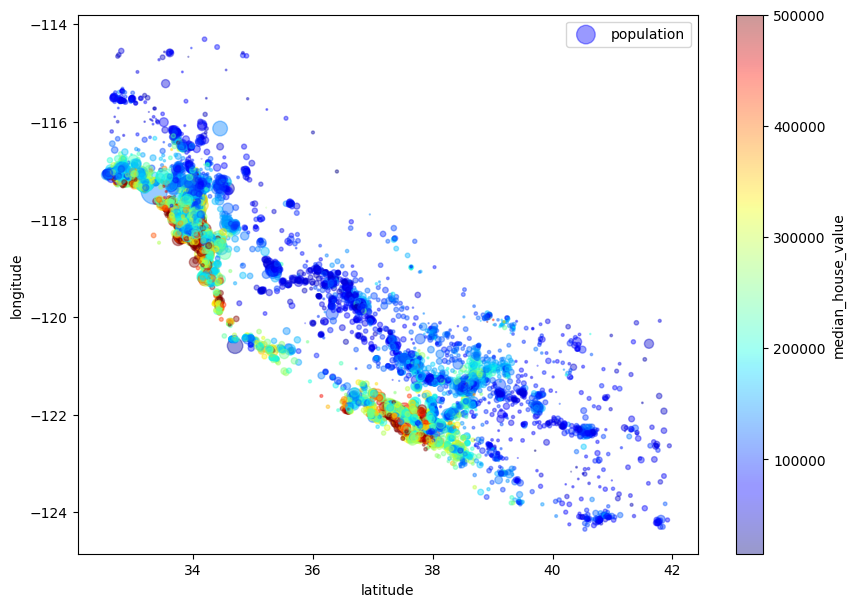

In [60]:
housing.plot(kind="scatter", x="latitude", y="longitude", figsize=(10, 7), alpha=0.4,
             s=housing["population"] / 100, label="population", c="median_house_value",
             cmap=plt.get_cmap("jet"), colorbar=True)

# S is the size of each point, based on population. 
# c is the color based on the median house value.

In [68]:
corr_matrix = housing.drop(columns="ocean_proximity").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

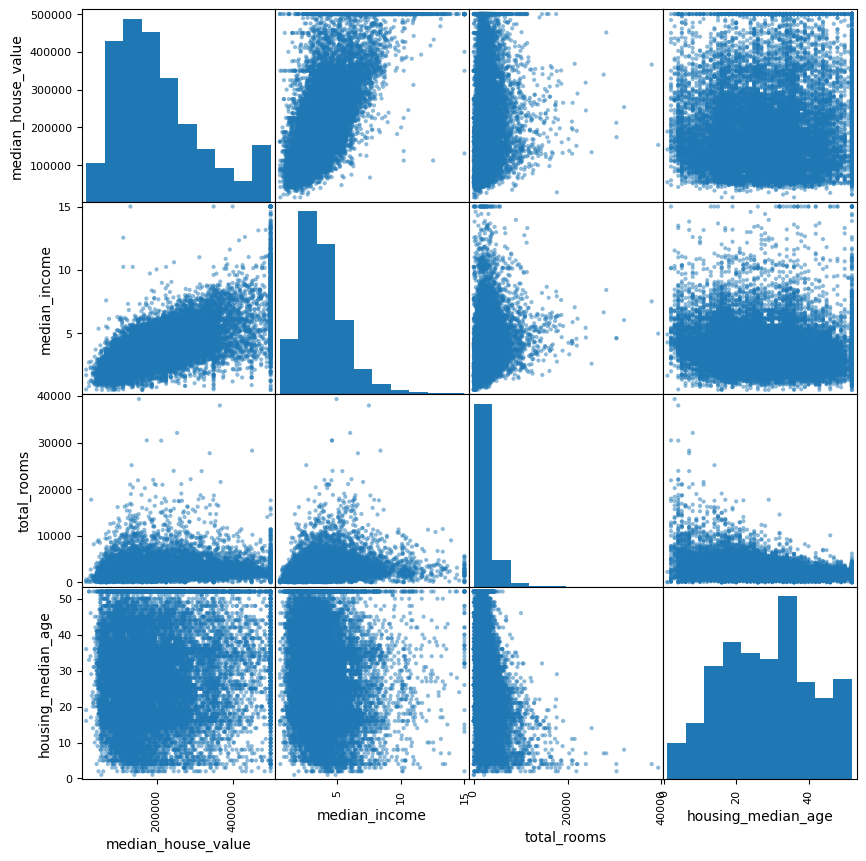

In [71]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(10,10))

Text(0.5, 0, 'Median Income')

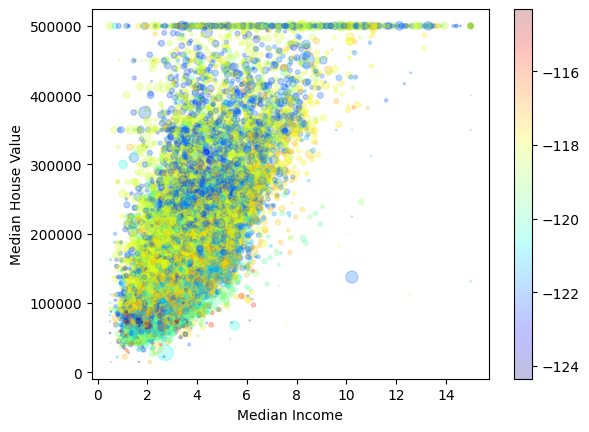

In [87]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.25,
             s=housing["population"] / 100, c=housing["longitude"], cmap=plt.get_cmap("jet"))
plt.ylabel("Median House Value")
plt.xlabel("Median Income")

In [89]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [91]:
corr_matrix = housing.drop(columns="ocean_proximity").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Data Cleaning

In [92]:
housing = strat_train_set.drop(columns="median_house_value")
housing_label = strat_train_set["median_house_value"].copy()

### Filling in missing values

In [93]:
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\yunfe\AppData\Local\Temp\ipykernel_18912\2497752895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


### Finding the median using simple imputer

In [100]:
from sklearn.impute import SimpleImputer

inputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
inputer.fit(housing_num)

X = inputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


### Encoding

In [104]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()

ocean_data = ordinal.fit_transform(housing[["ocean_proximity"]])
ocean_data[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [107]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
ocean_data = cat_encoder.fit_transform(housing[["ocean_proximity"]])
ocean_data.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


### Transformation pipeline

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attributes-adder', CombinedAttributesAdder()),
  ('standard-scaler', StandardScaler())
])

housing_data_final = my_pipeline.fit_transform(housing_num)

In [121]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_columns = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ("num", my_pipeline, num_attribs),
  ("cat", OneHotEncoder(), cat_columns)
])

housing_prepared = full_pipeline.fit_transform(housing)


# Training

In [122]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(housing_prepared, housing_label)

LinearRegression()

### Testing the linear model on some data

In [123]:
some_data_X = housing.iloc[:5]
some_data_y = housing_label.iloc[:5]
some_data_prepared_X = full_pipeline.transform(some_data_X)

print("PREDICTIONS: ", linear_regressor.predict(some_data_prepared_X))
print(some_data_y)

PREDICTIONS:  [ 85120. 305856. 152256. 186624. 244480.]
12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


### Finding the error

In [129]:
from sklearn.metrics import mean_squared_error

housing_predictions = linear_regressor.predict(housing_prepared)
print(housing_predictions)
print(housing_label)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_mse

[ 85120. 305856. 152256. ... 220800. 238784.  96832.]
12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64


4710687438.038094

### Decision tree model

In [131]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(housing_prepared, housing_label)

housing_predictions = tree_model.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_label)
tree_mse

# THE MODEL HAS FIT THE DATA TOO WELL!

0.0

In [133]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, housing_prepared, housing_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

c:\Users\yunfe\OneDrive\Desktop\CS 229\venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [134]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [79584.38456596 78166.8015253  81315.63496974 83079.13482876
 81695.82438997 86046.0499886  79823.76982373 81839.97650002
 83821.40624306 81502.42794042]
Mean: 81687.54107755673
Standard deviation: 2144.1762388427387
